In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# set max cols and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
survey = pd.read_csv('Moral Machine Data/SharedResponsesSurvey.csv')

/var/folders/kj/jqr6r99s1p945h2yplyzrglr0000gn/T/ipykernel_76132/3863514343.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('Moral Machine Data/SharedResponsesSurvey.csv')


In [4]:
survey.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6.968367e+15,13,0,0,0,0,Female,Gender,Gender,Male,Female,0.0,2,0,1,Desktop,0.0,0.0,RUS,32.0,bachelor,male,35000,0.5,0.61
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6.968367e+15,8,0,1,0,0,Fat,Fitness,Fitness,Fit,Fat,0.0,2,0,0,Desktop,0.0,0.0,RUS,32.0,bachelor,male,35000,0.5,0.61
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6.968367e+15,2,0,0,0,2,Young,Age,Age,Young,Old,1.0,2,0,0,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000,0.5,0.61
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6.968367e+15,1,0,1,0,2,Pets,Species,Species,Hoomans,Pets,0.0,3,0,0,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000,0.5,0.61
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6.968367e+15,5,0,1,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,2,0,0,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000,0.5,0.61


In [5]:
# only keep rows where the ResponseID shows up twice
duplicates = survey[survey['ResponseID'].duplicated(keep=False)]
duplicates.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6.968367e+15,13,0,0,0,0,Female,Gender,Gender,Male,Female,0.0,2,0,1,Desktop,0.0,0.0,RUS,32.0,bachelor,male,35000,0.5,0.61
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6.968367e+15,8,0,1,0,0,Fat,Fitness,Fitness,Fit,Fat,0.0,2,0,0,Desktop,0.0,0.0,RUS,32.0,bachelor,male,35000,0.5,0.61
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6.968367e+15,2,0,0,0,2,Young,Age,Age,Young,Old,1.0,2,0,0,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000,0.5,0.61
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6.968367e+15,1,0,1,0,2,Pets,Species,Species,Hoomans,Pets,0.0,3,0,0,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000,0.5,0.61
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6.968367e+15,5,0,1,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,2,0,0,Desktop,0.0,1.0,RUS,32.0,bachelor,male,35000,0.5,0.61


In [6]:
# find all unique values in the 'Review_education' column
education = duplicates['Review_education'].value_counts()
print(education)

Review_education
bachelor      2069856
graduate      1835710
high          1717880
underHigh     1543130
college       1405166
default       1355624
others         616360
vocational     355514
Name: count, dtype: int64


In [7]:
len(duplicates)

10899240

In [8]:
# remove all rows where 'Review_education' is 'default'
duplicates = duplicates[duplicates['Review_education'] != 'default']
print(len(duplicates))

9543616


In [9]:
print(duplicates.columns)

Index(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder',
       'Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
       'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice',
       'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Template', 'DescriptionShown',
       'LeftHand', 'UserCountry3', 'Review_age', 'Review_education',
       'Review_gender', 'Review_income', 'Review_political',
       'Review_religious'],
      dtype='object')


In [10]:
# drop all rows where Review_age is nan
# duplicates = duplicates.dropna(subset=['Review_age'])
# drop all rows with nan
duplicates = duplicates.dropna()
print(len(duplicates))

8221658


## Age

In [11]:
# drop all rows where Review_age is '' or where it is greater than 100
duplicates = duplicates[duplicates['Review_age'] != '']

In [12]:
# convert Review_age to int
duplicates['Review_age'] = duplicates['Review_age'].astype(float)

# drop all rows where Review_age is greater than 100
duplicates = duplicates[duplicates['Review_age'] <= 95]

# drop all rows where Review_age is less than 5
duplicates = duplicates[duplicates['Review_age'] >= 5]

print(len(duplicates))

8156002


<Axes: >

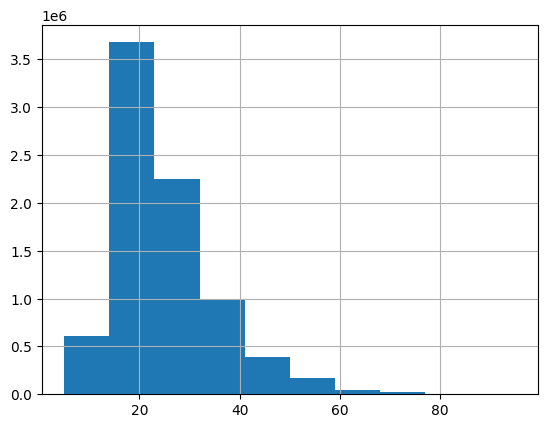

In [13]:
# age distribution
duplicates['Review_age'].hist()

## Education

In [14]:
duplicates['Review_education'].value_counts()

Review_education
bachelor      1789418
graduate      1565298
high          1481422
underHigh     1296828
college       1221570
others         495920
vocational     305546
Name: count, dtype: int64

In [15]:
# drop all rows where Review_education is 'others'
duplicates = duplicates[duplicates['Review_education'] != 'others']
duplicates['Review_education'].value_counts()

Review_education
bachelor      1789418
graduate      1565298
high          1481422
underHigh     1296828
college       1221570
vocational     305546
Name: count, dtype: int64

In [16]:
def map_education(education):
    mapping = {
        'underHigh':0,
        'high':1,
        'vocational':2,
        'college':3,
        'bachelor':4,
        'graduate':5
    }
    return mapping.get(education, None)

duplicates['Review_education'] = duplicates['Review_education'].apply(map_education)

In [17]:
duplicates['Review_education'].value_counts()

Review_education
4    1789418
5    1565298
1    1481422
0    1296828
3    1221570
2     305546
Name: count, dtype: int64

<Axes: >

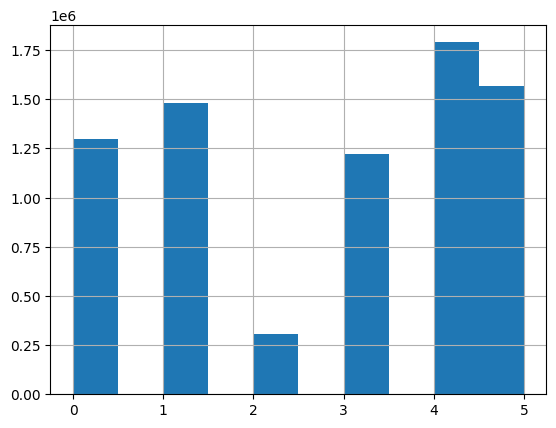

In [18]:
#hist with one bin per unique value
duplicates['Review_education'].hist()

## Income

In [19]:
duplicates['Review_income'].value_counts()

Review_income
under5000      2436390
default        1038372
5000            644366
50000           613700
35000           595342
above100000     541324
15000           537436
25000           502002
10000           473978
80000           268948
over10000         8224
Name: count, dtype: int64

In [20]:
# drop all rows where the income is 'default'
duplicates = duplicates[duplicates['Review_income'] != 'default']
print(len(duplicates))

# drop all rows where the income is 'over10000'
duplicates = duplicates[duplicates['Review_income'] != 'over10000']
print(len(duplicates))

6621710
6613486


In [21]:
def map_income(income):
    mapping = {
        'under5000': 0,
        '5000': 1,
        '10000': 2,
        '15000': 3,
        '25000': 4,
        '35000': 5,
        '50000': 6,
        '80000': 7,
        'above100000': 8,
        'default': None  
    }
    return mapping.get(income, None) 

duplicates['Review_income'] = duplicates['Review_income'].apply(map_income)

<Axes: >

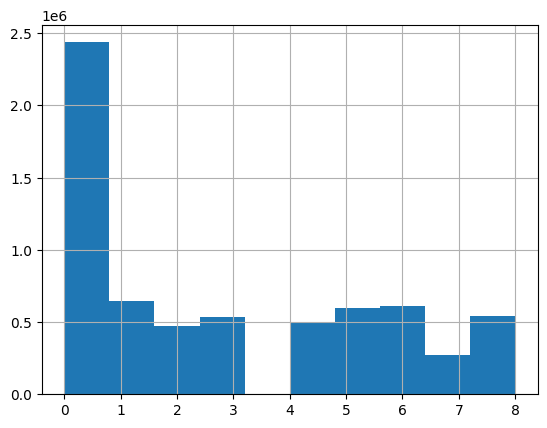

In [22]:
# hist of income with x rotated by 90

duplicates['Review_income'].hist()

## Gender

In [23]:
duplicates["Review_gender"].value_counts()

Review_gender
male       4822688
female     1653406
others      115264
default      22128
Name: count, dtype: int64

In [24]:
# Remove all rows where review gender is 'default'
duplicates = duplicates[duplicates['Review_gender'] != 'default']

print(len(duplicates))

6591358


In [25]:
def map_gender(gender):
    mapping = {
        'male': 0,
        'female': 1,
        'others': 2,
    }
    return mapping.get(gender, None)

duplicates['Review_gender'] = duplicates['Review_gender'].apply(map_gender)

<Axes: >

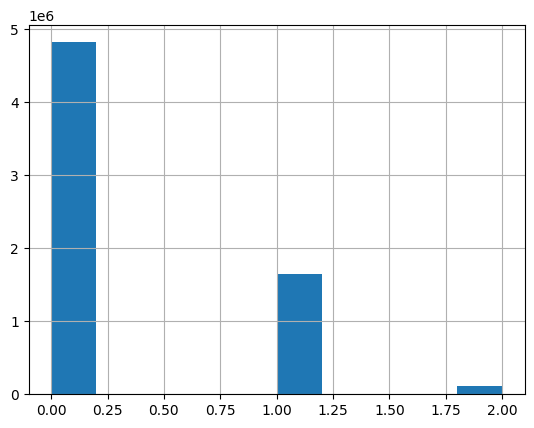

In [26]:
# hist
duplicates['Review_gender'].hist()

## Politics

In [27]:
duplicates["Review_political"].value_counts()

# Remove all rows where review political is 0.5
duplicates = duplicates[duplicates['Review_political'] != 0.5]

print(len(duplicates))

4697540


## Religion

In [28]:
duplicates["Review_religious"].value_counts()

# Remove all rows where review religious is 0.5
duplicates = duplicates[duplicates['Review_religious'] != 0.5]

# remove all values less than 0
duplicates = duplicates[duplicates['Review_religious'] >= 0]

print(len(duplicates))

4380026


<Axes: >

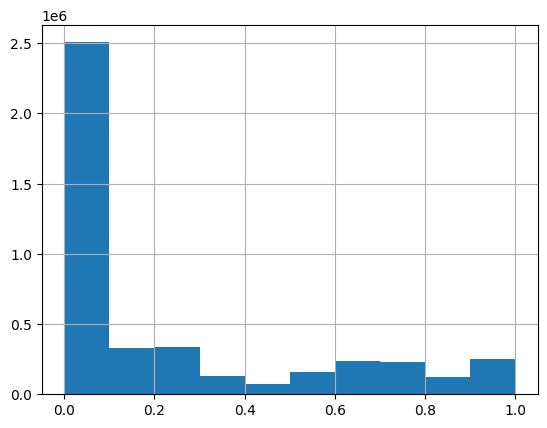

In [29]:
# show hist for religious
duplicates['Review_religious'].hist()

<Axes: >

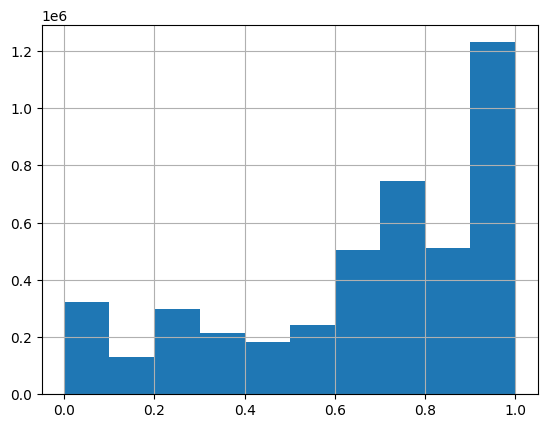

In [30]:
# show hist for political
duplicates['Review_political'].hist()

## Politics and Religion

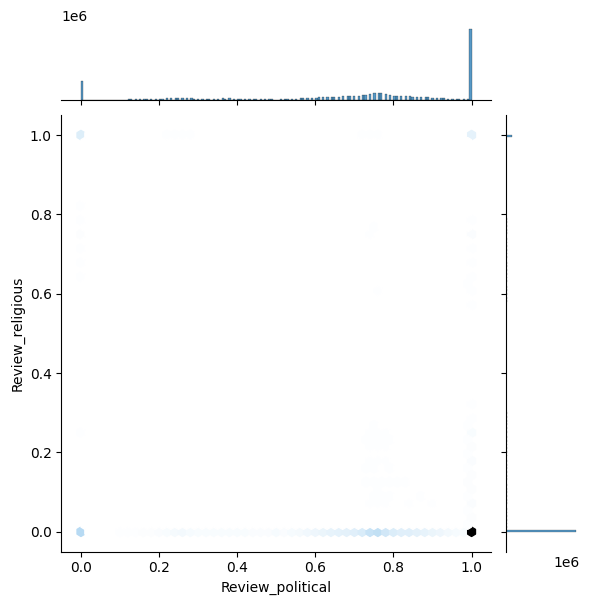

In [31]:
sns.jointplot(x='Review_political', y='Review_religious', data=duplicates, kind='hex')

## Age and Politics

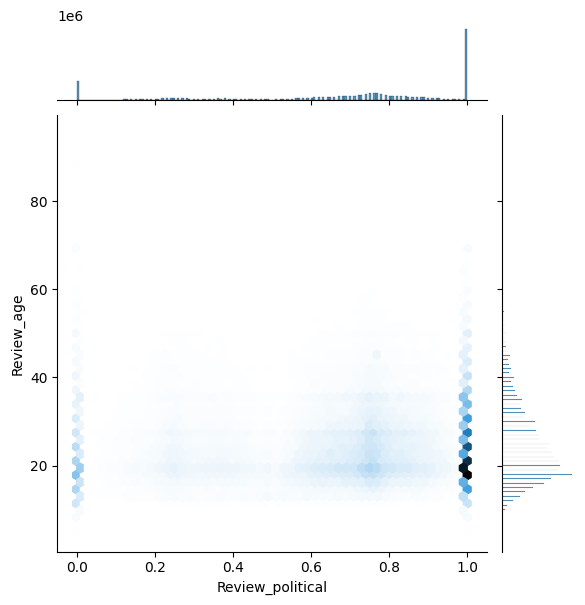

In [32]:
sns.jointplot(x='Review_political', y='Review_age', data=duplicates, kind='hex')

<Axes: >

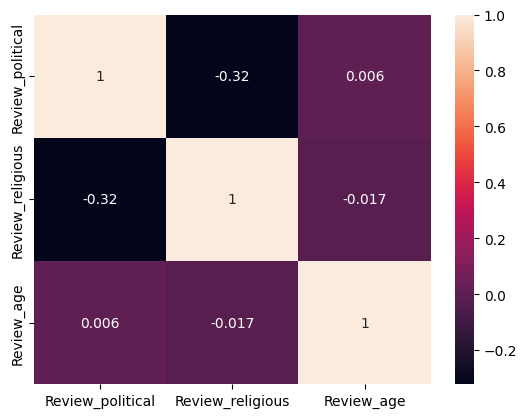

In [33]:
# heat map for age political and religious
sns.heatmap(duplicates[['Review_political', 'Review_religious', 'Review_age']].corr(), annot=True)

In [34]:
len(duplicates)

4380026

In [35]:
duplicates.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
13,QMcdnKDXB8aCjcyY7,-2147456672_5603843098383972.0,5.603843e+15,7,0,0,1,0,Hoomans,Species,Species,Hoomans,Pets,1.0,2,0,1,Desktop,0.0,1.0,BEL,23.0,5,0,5,0.65,0.0
14,ex8Yry3j5xs2gQB9t,-2147456672_5603843098383972.0,5.603843e+15,13,0,1,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,2,0,0,Desktop,0.0,1.0,BEL,23.0,5,0,5,0.65,0.0
15,gTsX5fFbjHHpeQWvf,-2147456672_5603843098383972.0,5.603843e+15,1,0,0,0,0,Young,Age,Age,Young,Old,1.0,1,0,0,Desktop,1.0,1.0,BEL,23.0,5,0,5,0.65,0.0
16,i7ztRb5RdTu27QT4y,-2147456672_5603843098383972.0,5.603843e+15,2,0,1,0,1,Male,Gender,Gender,Male,Female,1.0,4,0,1,Desktop,0.0,0.0,BEL,23.0,5,0,5,0.65,0.0
17,pymKD6vrEsZSNw6e2,-2147456672_5603843098383972.0,5.603843e+15,9,0,1,0,2,Old,Age,Age,Young,Old,0.0,3,0,0,Desktop,0.0,1.0,BEL,23.0,5,0,5,0.65,0.0


In [38]:
# normalize Review_age	Review_education	Review_gender	Review_income	Review_political	Review_religious
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
duplicates[['Review_age', 'Review_education', 'Review_gender', 'Review_income', 'Review_political', 'Review_religious']] = scaler.fit_transform(duplicates[['Review_age', 'Review_education', 'Review_gender', 'Review_income', 'Review_political', 'Review_religious']])
                                                                                                                                                            


In [39]:
duplicates.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
13,QMcdnKDXB8aCjcyY7,-2147456672_5603843098383972.0,5.603843e+15,7,0,0,1,0,Hoomans,Species,Species,Hoomans,Pets,1.0,2,0,1,Desktop,0.0,1.0,BEL,0.2,1.0,0.0,0.625,0.65,0.0
14,ex8Yry3j5xs2gQB9t,-2147456672_5603843098383972.0,5.603843e+15,13,0,1,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,2,0,0,Desktop,0.0,1.0,BEL,0.2,1.0,0.0,0.625,0.65,0.0
15,gTsX5fFbjHHpeQWvf,-2147456672_5603843098383972.0,5.603843e+15,1,0,0,0,0,Young,Age,Age,Young,Old,1.0,1,0,0,Desktop,1.0,1.0,BEL,0.2,1.0,0.0,0.625,0.65,0.0
16,i7ztRb5RdTu27QT4y,-2147456672_5603843098383972.0,5.603843e+15,2,0,1,0,1,Male,Gender,Gender,Male,Female,1.0,4,0,1,Desktop,0.0,0.0,BEL,0.2,1.0,0.0,0.625,0.65,0.0
17,pymKD6vrEsZSNw6e2,-2147456672_5603843098383972.0,5.603843e+15,9,0,1,0,2,Old,Age,Age,Young,Old,0.0,3,0,0,Desktop,0.0,1.0,BEL,0.2,1.0,0.0,0.625,0.65,0.0


In [40]:
# save to new csv
duplicates.to_csv('Moral Machine Data/SharedResponsesSurvey_cleaned.csv', index=False)